# Multi-class Logistic Regression

Multi-class logistic regression is a technique used for classification tasks with more than two classes. In scikit-learn, there are two main methods available for performing multi-class logistic regression:

**1. One-vs-Rest (OvR) Method**
- In the OvR method, also known as one-vs-all (OvA), a separate binary logistic regression model is trained for each class.
- Each model is trained to distinguish one class from all other classes combined.
- During prediction, each model produces a probability score for its corresponding class, and the class with the highest probability score is predicted as the final class.
- This method is straightforward to implement and interpret, making it a common choice for multi-class logistic regression tasks.

**2. Multinomial Logistic Regression**
- In multinomial logistic regression, a single model is trained to predict the probabilities of all classes simultaneously.
- The model directly calculates the probabilities of each class using a single set of coefficients.
- It employs a softmax activation function to ensure that the predicted probabilities sum up to 1 across all classes.
- This method is computationally efficient and can capture correlations between classes more effectively compared to the OvR method.

When using scikit-learn for multi-class logistic regression, you can specify the method using the multi_class parameter in the `LogisticRegression` class:

- Set `multi_class='ovr'` for the OvR method.
- Set `multi_class='multinomial'` for multinomial logistic regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

First, let's generate a synthetic dataset using scikit-learn's `make_blobs` function.

In [2]:
# define dataset
X, y = make_blobs(n_samples=1000, centers=[[-4, 0], [0, 1.5], [1, -2]])

In [3]:
# define a function for visualizing data points
# with the option to draw decision boundaries

def plotData(X, y):
    class1 = y == 0
    class2 = y == 1
    class3 = y == 2
    
    plt.scatter(X[class1, 0], X[class1, 1], color='r', marker='x', label='class1')
    plt.scatter(X[class2, 0], X[class2, 1], color='b', marker='o', label='class2')
    plt.scatter(X[class3, 0], X[class3, 1], color='g', marker='d', label='class3')        

    plt.xlabel('feature 1', size=14)
    plt.ylabel('feature 2', size=14)
    plt.legend()

    plt.xlim((np.min(X[:,0]),np.max(X[:,0])))
    plt.ylim((np.min(X[:,1]),np.max(X[:,1])))    

In [4]:
def plotDB(X, y, model):
    
    x_ = np.linspace(np.min(X), np.max(X), 100).reshape((-1,1))

    y1 = (-b[0] - w[0,0] * x_) / w[0,1]
    y2 = (-b[1] - w[1,0] * x_) / w[1,1]
    y3 = (-b[2] - w[2,0] * x_) / w[2,1]

    plt.plot(x_, y1, '--r', lw=1) # plot hyperplanes
    plt.plot(x_, y2, '--b', lw=1)
    plt.plot(x_, y3, '--g', lw=1)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)   

    plt.pcolormesh(xx, yy, z, shading='auto', alpha=.05)
    
    plt.xlim((np.min(X[:,0]),np.max(X[:,0])))
    plt.ylim((np.min(X[:,1]),np.max(X[:,1])))

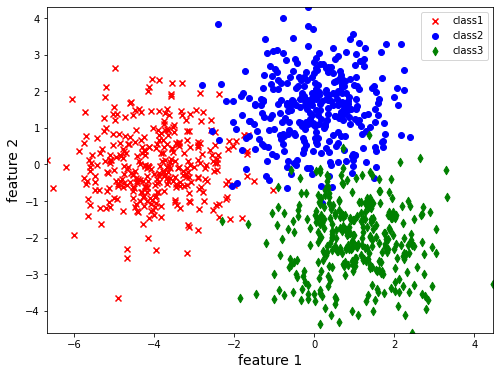

In [5]:
plt.figure(figsize=(8,6))
plotData(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## One-vs-Rest (OvR) Method

In [7]:
model = LogisticRegression(multi_class='ovr', solver="sag", max_iter=100, random_state=42) # define model

model.fit(X_train, y_train) # fit model

b = model.intercept_
w = model.coef_

print('b =\n', b, '\n\n')
print('w =\n', w)

b =
 [-6.46474888 -0.32274062 -1.830656  ] 


w =
 [[-3.26993653 -0.51490952]
 [ 1.22021763  2.54710369]
 [ 1.75569731 -3.14151573]]


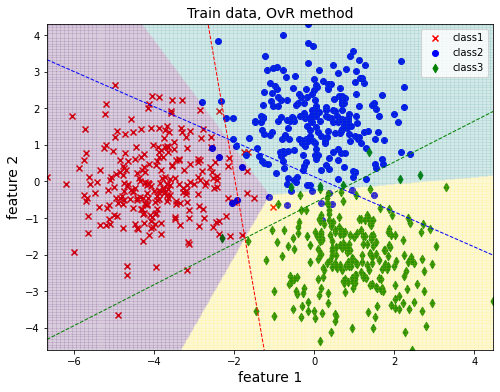

In [8]:
# visualize train data with decision boundaries
plt.figure(figsize=(8,6))
plotData(X_train, y_train)
plotDB(X_train, y_train, model)
plt.title('Train data, OvR method', fontsize=14);

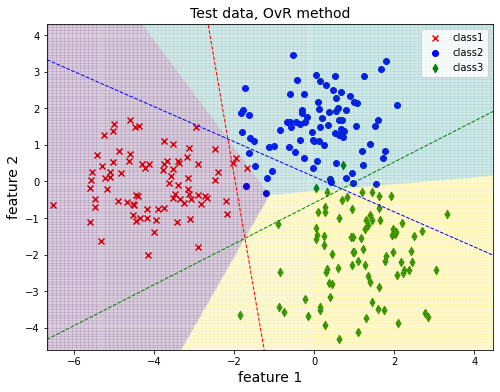

In [9]:
# visualize test data with decision boundaries
plt.figure(figsize=(8,6))
plotData(X_test, y_test)
plotDB(X_train, y_train, model)
plt.title('Test data, OvR method', fontsize=14);

In [10]:
print('model score =', model.score(X_test, y_test))

model score = 0.984


In [11]:
y_pred = model.predict(X_test) # make predictions on test data

print('confusion matrix:\n', confusion_matrix(y_test, y_pred))  # confusion matrix

confusion matrix:
 [[82  0  0]
 [ 2 83  0]
 [ 0  2 81]]


## Multinomial Logistic Regression

In [12]:
model = LogisticRegression(multi_class='multinomial') # define model

model.fit(X_train, y_train) # fit model

b = model.intercept_
w = model.coef_

print('b =\n', b, '\n\n')
print('w =\n', w)

b =
 [-2.98627231  2.1879433   0.79832901] 


w =
 [[-2.38384798  0.23802129]
 [ 0.75237424  1.77536031]
 [ 1.63147374 -2.0133816 ]]


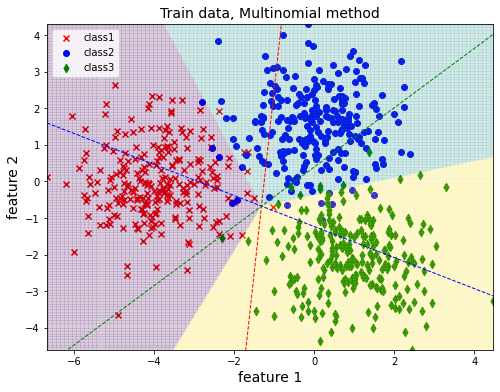

In [13]:
# visualize train data with decision boundaries
plt.figure(figsize=(8,6))
plotData(X_train, y_train)
plotDB(X_train, y_train, model)
plt.title('Train data, Multinomial method', fontsize=14);

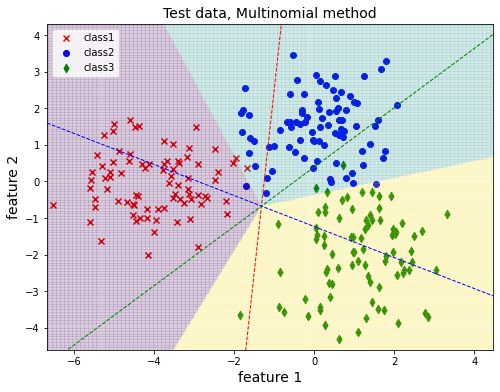

In [14]:
# visualize test data with decision boundaries
plt.figure(figsize=(8,6))
plotData(X_test, y_test)
plotDB(X_train, y_train, model)
plt.title('Test data, Multinomial method', fontsize=14);

In [15]:
print('model score =', model.score(X_test, y_test))

model score = 0.972


In [16]:
y_pred = model.predict(X_test) # make predictions on test data

print('confusion matrix:\n', confusion_matrix(y_test, y_pred))  # confusion matrix

confusion matrix:
 [[80  2  0]
 [ 1 83  1]
 [ 0  3 80]]
